In [2]:
import sys
sys.path.append('/Users/yuch8913/miniforge3/envs/er3t_env/lib/python3.8/site-packages')
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from glob import glob
import numpy as np
from sys import exit as ext
import copy
from bisect import bisect_left
from oco_post_class_ywc import *
from matplotlib import cm
from scipy.interpolate import interpn
from scipy import stats
import geopy.distance
import xarray as xr
import seaborn as sns
from tool_code import *
%matplotlib inline
import os, pickle 
#"""

from matplotlib import font_manager

font_path = '/System/Library/Fonts/Supplemental/Arial.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
#"""

import warnings
warnings.filterwarnings("ignore")

In [6]:
cld_dis = pd.read_pickle('cld_slope_inter_central_asia_20181018_2_test_basic.pkl')

In [7]:
cld_dis

,lon,lat,cld_dis,o2a_slope,o2a_inter,wco2_slope,wco2_inter,sco2_slope,sco2_inter,o2a_continuum_3d,o2a_continuum_clr,wco2_continuum_3d,wco2_continuum_clr,sco2_continuum_3d,sco2_continuum_clr
0,55.001240,33.701242,8.817647,-0.190999,0.017179,-0.010002,0.001246,0.007847,-0.002492,0.095099,0.099151,0.027136,0.027207,0.007499,0.007537
1,55.001240,33.708692,8.542287,-0.186265,0.022234,-0.006415,0.001446,-0.003012,-0.000493,0.096133,0.099379,0.027100,0.027106,0.007453,0.007483
2,55.001240,33.716142,8.266933,-0.122023,0.015616,-0.011745,0.001285,-0.005675,0.002403,0.096045,0.097853,0.027245,0.027279,0.007328,0.007343
3,55.001240,33.723593,7.991587,-0.049470,0.007801,-0.027782,0.006220,0.015629,-0.003510,0.091082,0.091345,0.025879,0.025875,0.006866,0.006890
4,55.001240,33.731043,7.716248,0.053141,-0.006298,-0.010583,0.002663,0.013925,-0.001948,0.085655,0.085117,0.024197,0.024187,0.006335,0.006339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,55.588843,34.409023,11.960249,0.026343,0.000778,0.033268,-0.006635,-0.013989,0.001831,0.073079,0.072587,0.018703,0.018658,0.005736,0.005739
7996,55.588843,34.416474,12.070621,0.011089,0.003477,-0.032043,0.006862,0.004357,0.000362,0.075120,0.074510,0.019096,0.019121,0.005903,0.005903
7997,55.588843,34.423924,12.186222,0.057203,-0.000249,0.001160,0.001092,0.004722,-0.001561,0.074757,0.073745,0.018875,0.018859,0.005785,0.005797
7998,55.588843,34.431374,12.306903,0.077611,-0.001207,0.011807,-0.002506,0.002500,0.000013,0.075725,0.074357,0.019211,0.019208,0.005825,0.005834


In [29]:
data_0 = pd.read_pickle('20181018_central_asia_2_470cloud_test_basic_o2a.pkl')

In [31]:
data_1 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_o2a.pkl')
data_1_plus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_pus_0.2_sza_48.5_o2a.pkl')
data_1_minus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_minus_0.2_sza_48.5_o2a.pkl')

data_2 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_sza_30_o2a.pkl')
data_2_plus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_plus_0.2_sza_30_o2a.pkl')
data_2_minus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_minus_0.2_sza_30_o2a.pkl')

data_3 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_sza_60_o2a.pkl')
data_3_plus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_plus_0.2_sza_60_o2a.pkl')
data_3_minus_02 = pd.read_pickle('20181018_central_asia_2_470cloud_test_avg_sfc_albedo_minus_0.2_sza_60_o2a.pkl')





In [4]:
data_1

In [5]:
data_1.slope_1km_all

array([[[ 0.0228077 ,  0.03229754],
        [-0.03385229,  0.03622149],
        [-0.02019366,  0.03914262],
        ...,
        [ 0.0136782 ,  0.02165847],
        [ 0.01792556,  0.03774705],
        [ 0.00286202,  0.04921727]],

       [[ 0.01876899,  0.02903195],
        [-0.00414515,  0.01209491],
        [-0.03094434,  0.01609417],
        ...,
        [-0.00165931,  0.01607438],
        [ 0.00366701,  0.01926855],
        [ 0.00758598,  0.04518699]],

       [[ 0.05547827,  0.02534892],
        [ 0.0071971 ,  0.00933662],
        [ 0.00261285,  0.01477237],
        ...,
        [ 0.00032332,  0.00888664],
        [ 0.02852175,  0.00650703],
        [ 0.04637598,  0.02368408]],

       ...,

       [[-0.02465088,  0.01232428],
        [ 0.00883563,  0.02649899],
        [ 0.07213249,  0.01988873],
        ...,
        [ 0.02462639,  0.02232355],
        [ 0.00242977,  0.02960166],
        [ 0.01123517,  0.01513686]],

       [[ 0.03858192,  0.01996139],
        [ 0.03977886,  0.02

In [8]:
"""print(data_1.shape)
print(data_2.shape)
df_all = data_1.append(data_2, ignore_index=True)
#df_all = df_all.append(data_3, ignore_index=True)
#df_all = df_all.append(data_4, ignore_index=True)
#df_all = df_all.append(data_5, ignore_index=True)
df_all = df_all.append(data_6, ignore_index=True)
print(df_all.shape)"""

df_all = cld_dis.copy()

In [58]:
def heatmap_xy(x, y, ax):
    from matplotlib.colors import LogNorm
    light_jet = cmap_map(lambda x: x/3*2 + 0.33, cm.jet)
    mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x, y = x[mask], y[mask]
    # Calculate the point density
    data , x_e, y_e = np.histogram2d(x, y, bins=15)#, density=True)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), data, np.vstack([x, y]).T, method="splinef2d", bounds_error=False)
    z[np.where(np.isnan(z))] = 0.0
    z[np.where(np.isinf(z))] = np.nanmax(z)
    z[np.where(z<0)] = 0.0
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    plot_x, plot_y, z = np.array(x)[idx], np.array(y)[idx], z[idx]
    #ax.scatter(plot_x, plot_y, c=z, s=15*z/np.nanmax(z), cmap=light_jet)
    ax.scatter(plot_x, plot_y, s=3, c='k')
    #ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)
    out = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
    sns.kdeplot(out, x='x', y='y', cmap='hot_r', n_levels=20, fill=True, ax=ax, alpha=0.65)
    return plot_x, plot_y, z

In [57]:
"""
def heatmap_xy(x, y, ax):
    from matplotlib.colors import LogNorm
    light_jet = cmap_map(lambda x: x/3*2 + 0.33, cm.jet)
    mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x, y = x[mask], y[mask]
    # Calculate the point density
    data , x_e, y_e = np.histogram2d(x, y, bins=150)#, density=True)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), data, np.vstack([x, y]).T, method="splinef2d", bounds_error=False)
    z[np.where(np.isnan(z))] = 0.0
    z[np.where(np.isinf(z))] = np.nanmax(z)
    z[np.where(z<0)] = 0.0
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    plot_x, plot_y, z = np.array(x)[idx], np.array(y)[idx], z[idx]
    #ax.scatter(plot_x, plot_y, c=z, s=15*z/np.nanmax(z), cmap=light_jet)
    #ax.scatter(plot_x, plot_y, s=3, c='k')
    ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)
    #out = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
    #sns.kdeplot(out, x='x', y='y', cmap='hot_r', n_levels=20, fill=True, ax=ax, alpha=0.65)
    return plot_x, plot_y, z
#"""

'\ndef heatmap_xy(x, y, ax):\n    from matplotlib.colors import LogNorm\n    light_jet = cmap_map(lambda x: x/3*2 + 0.33, cm.jet)\n    mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))\n    x, y = x[mask], y[mask]\n    # Calculate the point density\n    data , x_e, y_e = np.histogram2d(x, y, bins=150)#, density=True)\n    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), data, np.vstack([x, y]).T, method="splinef2d", bounds_error=False)\n    z[np.where(np.isnan(z))] = 0.0\n    z[np.where(np.isinf(z))] = np.nanmax(z)\n    z[np.where(z<0)] = 0.0\n    # Sort the points by density, so that the densest points are plotted last\n    idx = z.argsort()\n    plot_x, plot_y, z = np.array(x)[idx], np.array(y)[idx], z[idx]\n    #ax.scatter(plot_x, plot_y, c=z, s=15*z/np.nanmax(z), cmap=light_jet)\n    #ax.scatter(plot_x, plot_y, s=3, c=\'k\')\n    ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)\n    #out = pd.DataFrame(np.array([x, y]).T, columns=[\'x

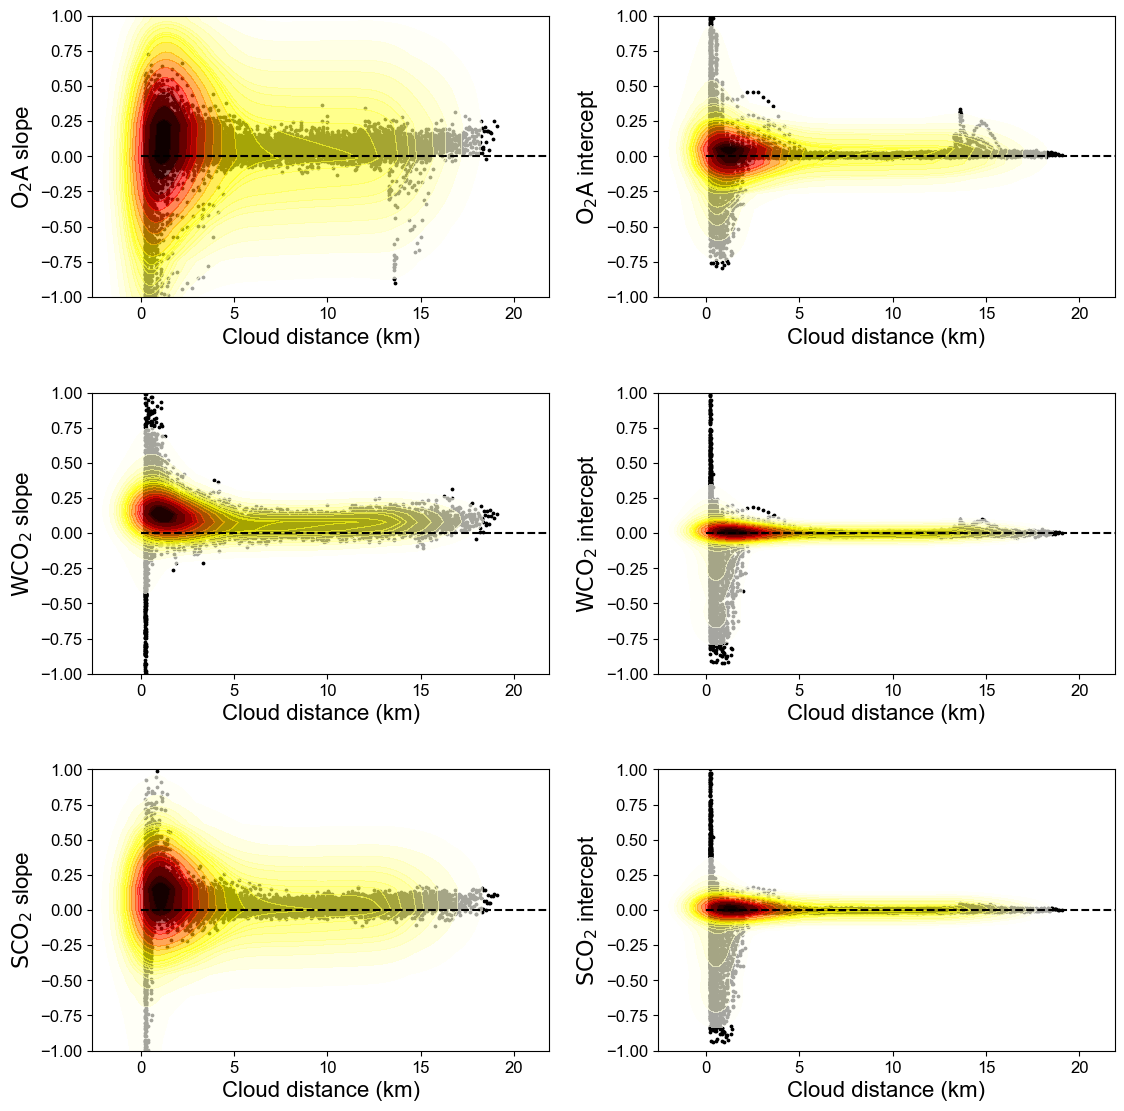

In [59]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12

cloud_dist = df_all.cld_dis
mask = cloud_dist > 0


heatmap_xy(cloud_dist[mask], df_all.o2a_slope[mask], ax11)
heatmap_xy(cloud_dist[mask], df_all.o2a_inter[mask], ax12)
heatmap_xy(cloud_dist[mask], df_all.wco2_slope[mask], ax21)
heatmap_xy(cloud_dist[mask], df_all.wco2_inter[mask], ax22)
heatmap_xy(cloud_dist[mask], df_all.sco2_slope[mask], ax31)
heatmap_xy(cloud_dist[mask], df_all.sco2_inter[mask], ax32)

for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    _, xmax = ax.get_xlim()
    ax.hlines(0, 0, xmax, linestyle='--', color='k')

ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{WCO_2}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{WCO_2}$ intercept', fontsize=label_size)
ax31.set_ylabel('$\mathrm{SCO_2}$ slope', fontsize=label_size)
ax32.set_ylabel('$\mathrm{SCO_2}$ intercept', fontsize=label_size)


for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-1, 1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-1, 1)
#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

In [84]:
def heatmap_xy_2(x, y, ax):
    light_jet = cmap_map(lambda x: x/3*2 + 0.33, cm.jet)
    mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x, y = x[mask], y[mask]
    # Calculate the point density
    
    interval = 1/2
    start = 0.5
    cld_levels = np.arange(start, 15, interval)
    value_avg, value_std = np.zeros(len(cld_levels)-1), np.zeros(len(cld_levels)-1)
    for i in range(len(cld_levels)-1):
        select = np.logical_and(x>=cld_levels[i], x < cld_levels[i+1])
        if select.sum()>0:
            #value_avg[i] = np.nanmean(y[select])
            #value_std[i] = np.nanstd(y[select])
            value_avg[i] = np.percentile(y[select], 50)
            value_std[i] = np.percentile(y[select], 75)-np.percentile(y[select], 25)
        else:
            value_avg[i] = np.nan
            value_std[i] = np.nan
    cld_list = (cld_levels[:-1] + cld_levels[1:])/2
    ax.scatter(x[x<start], y[x<start], s=1, color='lightgrey')
    ax.scatter(x[x>=start], y[x>=start], s=1, color='k')
    ax.errorbar(cld_list, value_avg, yerr=value_std, 
                marker='s', color='r', linewidth=2, linestyle='')#light_jet)
    
    
    
    val_mask = ~(np.isnan(value_avg) | np.isnan(value_std) | np.isinf(value_avg) | np.isinf(value_std))
    print(value_avg[val_mask])
    print(value_std[val_mask])
    temp_r2 = 0
    for cld_max in np.arange(3, 15, 0.5):
        cld_val = cld_list[val_mask]
        xx = cld_val[cld_val<=cld_max]
        yy = value_avg[val_mask][cld_val<=cld_max]
        popt, pcov = curve_fit(func, xx, yy, bounds=([-2, 0.], [2, 10,]),
                               p0=(0.1, 0.7),
                               maxfev=3000,
                               #sigma=value_std[val_mask], 
                               #absolute_sigma=True,
                              )
        print('-'*15)
        print(pcov)
        perr = np.sqrt(np.diag(pcov))
        print(perr)

        """residuals = yy - func(xx, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((yy-np.mean(yy))**2)
        r_squared = 1 - (ss_res / ss_tot)"""
        print(f'cld max: {cld_max}, R2:', r_squared)
        if r_squared > temp_r2:
            temp_r2 = r_squared
        else:
            break
    
    ax.plot(cld_list, func(cld_list, *popt), '--', color='orange', 
              label='fit: a=%5.3f, b=%5.3f' % tuple(popt), linewidth=3.5)
    
    #ax.plot(cld_list, func(cld_list, 1, 2), '--', color='green',)
    #ax.plot(cld_list, func(cld_list, 0.2, 1), '--', color='cyan',)
    ax.legend()
    return None#XX, YY, heatmap

from  scipy.optimize import curve_fit

def func(x, a, b):
     return a * np.exp(-b * x)

[0.06029424 0.04269128 0.02907185 0.01855225 0.01740773 0.01562545
 0.00567397 0.00913453 0.00933822 0.00832901 0.01536503 0.01853432
 0.02289026 0.01829144 0.02434017 0.02187878 0.03175027 0.0098056
 0.01213338 0.01590292 0.05449588 0.02692718 0.02184677 0.00041958]
[0.05417238 0.04184882 0.04105105 0.04022392 0.03372552 0.03383935
 0.03562507 0.03578169 0.04337052 0.04265789 0.04320149 0.04408524
 0.05531109 0.0525545  0.05399112 0.05865379 0.0411819  0.05491724
 0.02690626 0.03746371 0.05780428 0.04959089 0.05300878 0.02807634]
---------------
[[3.86511173e-05 2.68486682e-04]
 [2.68486682e-04 2.26122220e-03]]
[0.006217   0.04755231]
cld max: 3.0, R2: 0.9896589093478144
---------------
[[5.95154704e-05 3.98977116e-04]
 [3.98977116e-04 3.34214277e-03]]
[0.00771463 0.05781127]
cld max: 3.5, R2: 0.9771276536800363
[ 1.17635910e-02  4.23867361e-03  2.58250874e-03  1.89576186e-03
  6.81187926e-04  5.16178226e-04  2.38820627e-04  9.77075712e-05
  2.85348182e-04  1.76627965e-04  4.12404089e

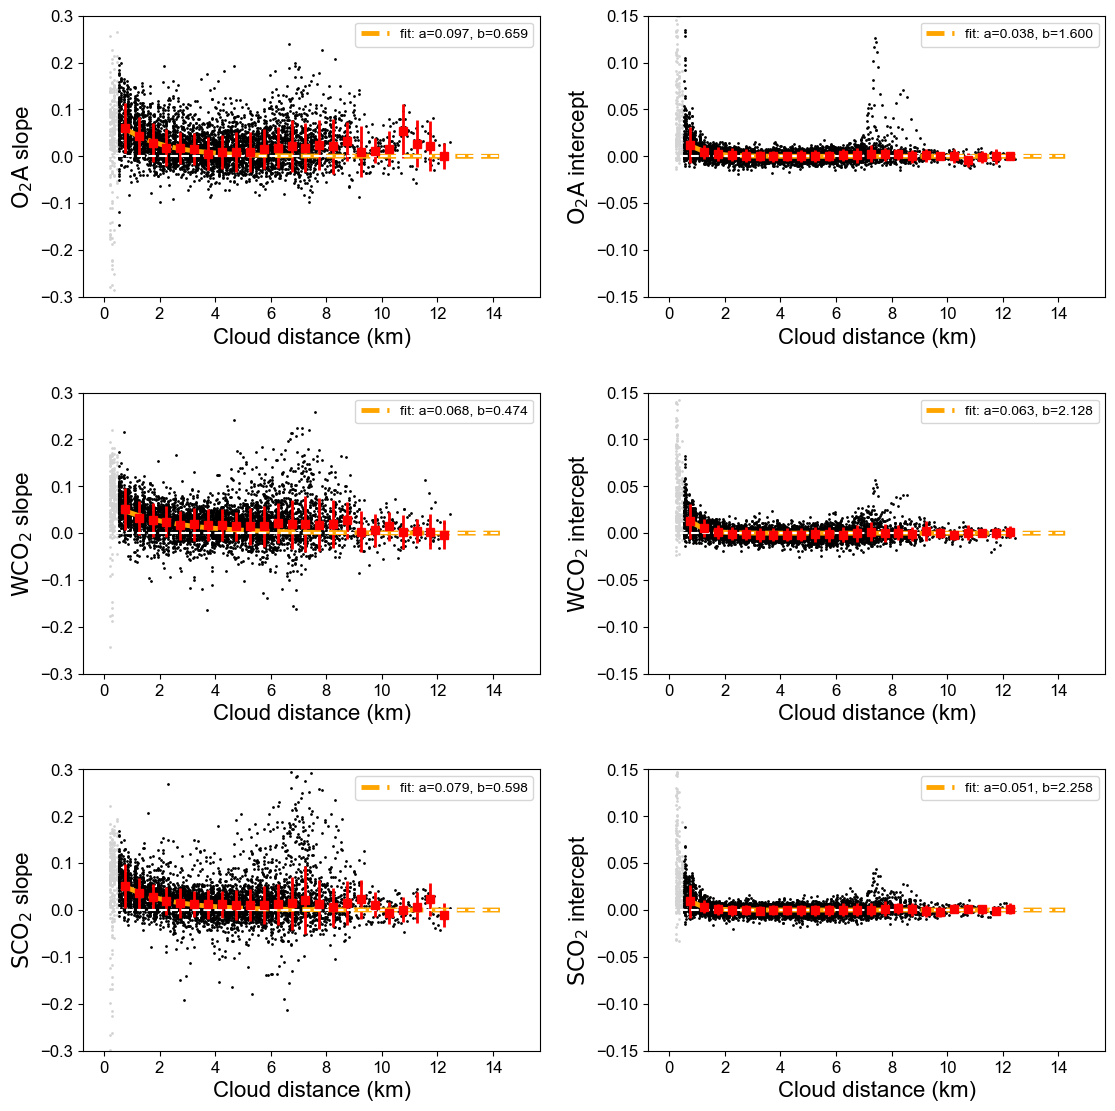

In [85]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12

cloud_dist = df_all.cld_dis
rad_3d = df_all.sco2_continuum_3d
rad_clr = df_all.sco2_continuum_clr

mask = cloud_dist > 0
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)

#"""

heatmap_xy_2(cloud_dist[mask], df_all.o2a_slope[mask], ax11)
heatmap_xy_2(cloud_dist[mask], df_all.o2a_inter[mask], ax12)
heatmap_xy_2(cloud_dist[mask], df_all.wco2_slope[mask], ax21)
heatmap_xy_2(cloud_dist[mask], df_all.wco2_inter[mask], ax22)
heatmap_xy_2(cloud_dist[mask], df_all.sco2_slope[mask], ax31)
heatmap_xy_2(cloud_dist[mask], df_all.sco2_inter[mask], ax32)
#"""


#popt, pcov = curve_fit(func, cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])#, bounds=(0, [3., 1., 0.5]))

#ax11.plot(cloud_dist[mask], func(cloud_dist[mask], *popt), 'r--',
#          label='fit: a=%5.3f, b=%5.3ff' % tuple(popt))


"""
ax11.scatter(cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])
ax12.scatter(cloud_dist[mask], o1.inter_1km_all[:,:,0][mask])
ax21.scatter(cloud_dist[mask], o2.slope_1km_all[:,:,0][mask])
ax22.scatter(cloud_dist[mask], o2.inter_1km_all[:,:,0][mask])
ax31.scatter(cloud_dist[mask], o3.slope_1km_all[:,:,0][mask])
ax32.scatter(cloud_dist[mask], o3.inter_1km_all[:,:,0][mask])
#"""
for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    _, xmax = ax.get_xlim()
    ax.hlines(0, 0, xmax, linestyle='--', color='white')
    
ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{WCO_2}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{WCO_2}$ intercept', fontsize=label_size)
ax31.set_ylabel('$\mathrm{SCO_2}$ slope', fontsize=label_size)
ax32.set_ylabel('$\mathrm{SCO_2}$ intercept', fontsize=label_size)

limit_1 = 0.3
limit_2 = 0.15
for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-limit_1, limit_1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-limit_2, limit_2)

#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

In [11]:
def heatmap_xy_3(x, y, ax):
    from matplotlib.colors import LogNorm
    light_jet = cmap_map(lambda x: x/3*2 + 0.33, cm.jet)
    mask = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x, y = x[mask], y[mask]
    interval = 1/2
    start = 0.5
    
    
    # Calculate the point density
    data , x_e, y_e = np.histogram2d(x, y, bins=15)#, density=True)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])), data, np.vstack([x, y]).T, method="splinef2d", bounds_error=False)
    z[np.where(np.isnan(z))] = 0.0
    z[np.where(np.isinf(z))] = np.nanmax(z)
    z[np.where(z<0)] = 0.0
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    plot_x, plot_y, z = np.array(x)[idx], np.array(y)[idx], z[idx]
    #ax.scatter(plot_x, plot_y, c=z, s=15*z/np.nanmax(z), cmap=light_jet)
    
    
    
    ax.scatter(x[x<start], y[x<start], s=1, color='lightgrey')
    ax.scatter(x[x>=start], y[x>=start], s=1, color='k')
    #ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)
    out = pd.DataFrame(np.array([x, y]).T, columns=['x', 'y'])
    sns.kdeplot(out, x='x', y='y', cmap='hot_r', n_levels=20, fill=True, ax=ax, alpha=0.65)
    
    
    
    
    
    cld_levels = np.arange(start, 18, interval)
    value_avg, value_std = np.zeros(len(cld_levels)-1), np.zeros(len(cld_levels)-1)
    for i in range(len(cld_levels)-1):
        select = np.logical_and(x>=cld_levels[i], x < cld_levels[i+1])
        if select.sum()>0:
            #value_avg[i] = np.nanmean(y[select])
            #value_std[i] = np.nanstd(y[select])
            value_avg[i] = np.percentile(y[select], 50)
            value_std[i] = np.percentile(y[select], 75)-np.percentile(y[select], 25)
        else:
            value_avg[i] = np.nan
            value_std[i] = np.nan
    cld_list = (cld_levels[:-1] + cld_levels[1:])/2
    
    ax.errorbar(cld_list, value_avg, yerr=value_std, 
                marker='s', color='r', linewidth=2, linestyle='', ecolor='skyblue')#light_jet)
    
    val_mask = ~(np.isnan(value_avg) | np.isnan(value_std) | np.isinf(value_avg) | np.isinf(value_std))
    #print(value_avg[val_mask])
    #print(value_std[val_mask])
    temp_r2 = 0
    for cld_max in np.arange(3, 15, 0.5):
        cld_val = cld_list[val_mask]
        xx = cld_val[cld_val<=cld_max]
        yy = value_avg[val_mask][cld_val<=cld_max]
        popt, pcov = curve_fit(func, xx, yy, bounds=([-2, 0.], [2, 10,]),
                               p0=(0.1, 0.7),
                               maxfev=3000,
                               #sigma=value_std[val_mask], 
                               #absolute_sigma=True,
                              )
        residuals = yy - func(xx, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((yy-np.mean(yy))**2)
        r_squared = 1 - (ss_res / ss_tot)

        if r_squared > temp_r2:
            temp_r2 = r_squared
        else:
            break
    
    plot_xx = np.arange(0, cld_list.max()+0.75, 0.5)
    ax.plot(plot_xx, func(plot_xx, *popt), '--', color='limegreen', 
              label='fit: a=%5.3f\n     b=%5.3f' % tuple(popt), linewidth=3.5)
    print('-'*15)
    print(f'E-folding dis: {1/popt[1]}')
    #ax.plot(cld_list, func(cld_list, 1, 2), '--', color='green',)
    #ax.plot(cld_list, func(cld_list, 0.2, 1), '--', color='cyan',)
    ax.legend()
    return None#XX, YY, heatmap



from  scipy.optimize import curve_fit

def func(x, a, b):
     return a * np.exp(-b * x)

---------------
E-folding dis: 2.565843160078977
---------------
E-folding dis: 0.7059159681006063
---------------
E-folding dis: 5.643213052341552
---------------
E-folding dis: 0.7759383592518968


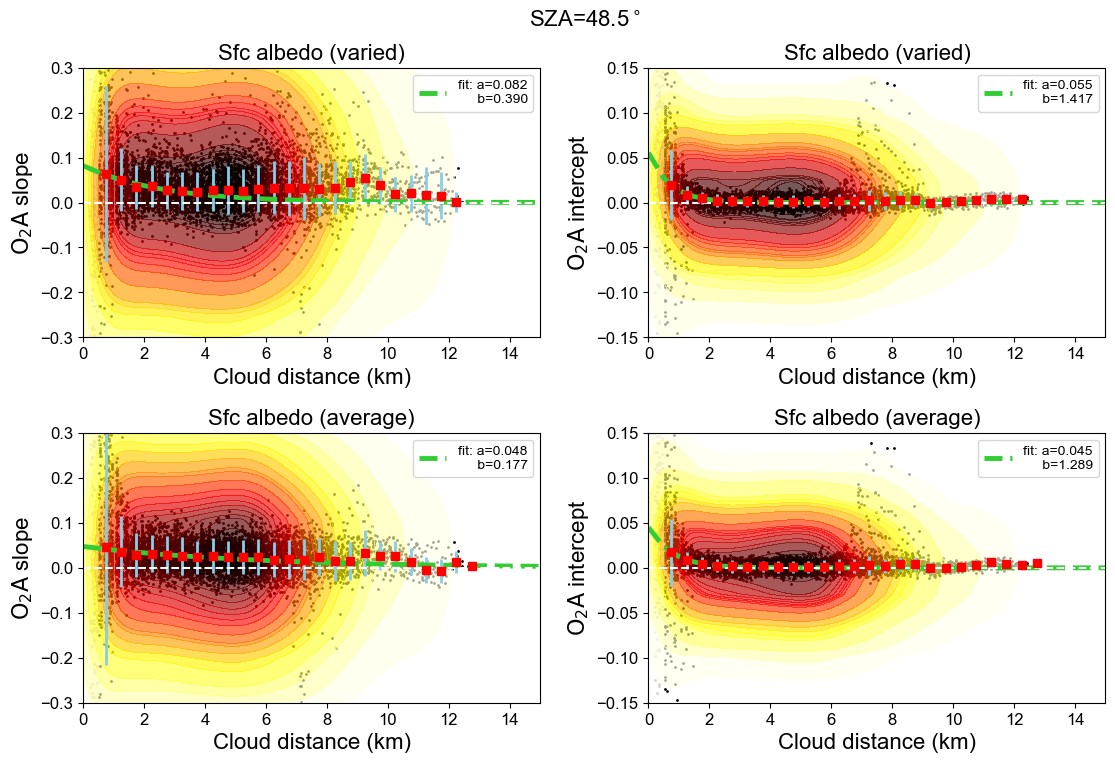

In [30]:
fig, ((ax11, ax12), 
      (ax21, ax22),) = plt.subplots(2, 2, figsize=(12, 8), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12



#"""

cloud_dist = df_all.cld_dis
rad_3d = data_0.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_0.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_0.slope_1km_all[:,:,0].flatten()[mask], ax11)
heatmap_xy_3(cloud_dist[mask], data_0.inter_1km_all[:,:,0].flatten()[mask], ax12)


cloud_dist = df_all.cld_dis
rad_3d = data_1.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_1.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_1.slope_1km_all[:,:,0].flatten()[mask], ax21)
heatmap_xy_3(cloud_dist[mask], data_1.inter_1km_all[:,:,0].flatten()[mask], ax22)



#"""


#popt, pcov = curve_fit(func, cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])#, bounds=(0, [3., 1., 0.5]))

#ax11.plot(cloud_dist[mask], func(cloud_dist[mask], *popt), 'r--',
#          label='fit: a=%5.3f, b=%5.3ff' % tuple(popt))


"""
ax11.scatter(cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])
ax12.scatter(cloud_dist[mask], o1.inter_1km_all[:,:,0][mask])
ax21.scatter(cloud_dist[mask], o2.slope_1km_all[:,:,0][mask])
ax22.scatter(cloud_dist[mask], o2.inter_1km_all[:,:,0][mask])
ax31.scatter(cloud_dist[mask], o3.slope_1km_all[:,:,0][mask])
ax32.scatter(cloud_dist[mask], o3.inter_1km_all[:,:,0][mask])
#"""
for ax in [ax11, ax21, ax12, ax22, ]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = 0, 15
    ax.set_xlim(xmin, xmax)
    ax.hlines(0, 0, xmax, linestyle='--', color='white')
    
ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)


ax11.set_title('Sfc albedo (varied)', fontsize=label_size)
ax12.set_title('Sfc albedo (varied)', fontsize=label_size)
ax21.set_title('Sfc albedo (average)', fontsize=label_size)
ax22.set_title('Sfc albedo (average)', fontsize=label_size)


limit_1 = 0.3
limit_2 = 0.15
for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-limit_1, limit_1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-limit_2, limit_2)

    
fig.suptitle('SZA=48.5$^\circ$', fontsize=16)

#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

---------------
E-folding dis: 5.643213052341552
---------------
E-folding dis: 0.7759383592518968
---------------
E-folding dis: 5.035002243640005
---------------
E-folding dis: 0.8499857797289971
---------------
E-folding dis: 1.4404888642963438
---------------
E-folding dis: 0.9580237447910749


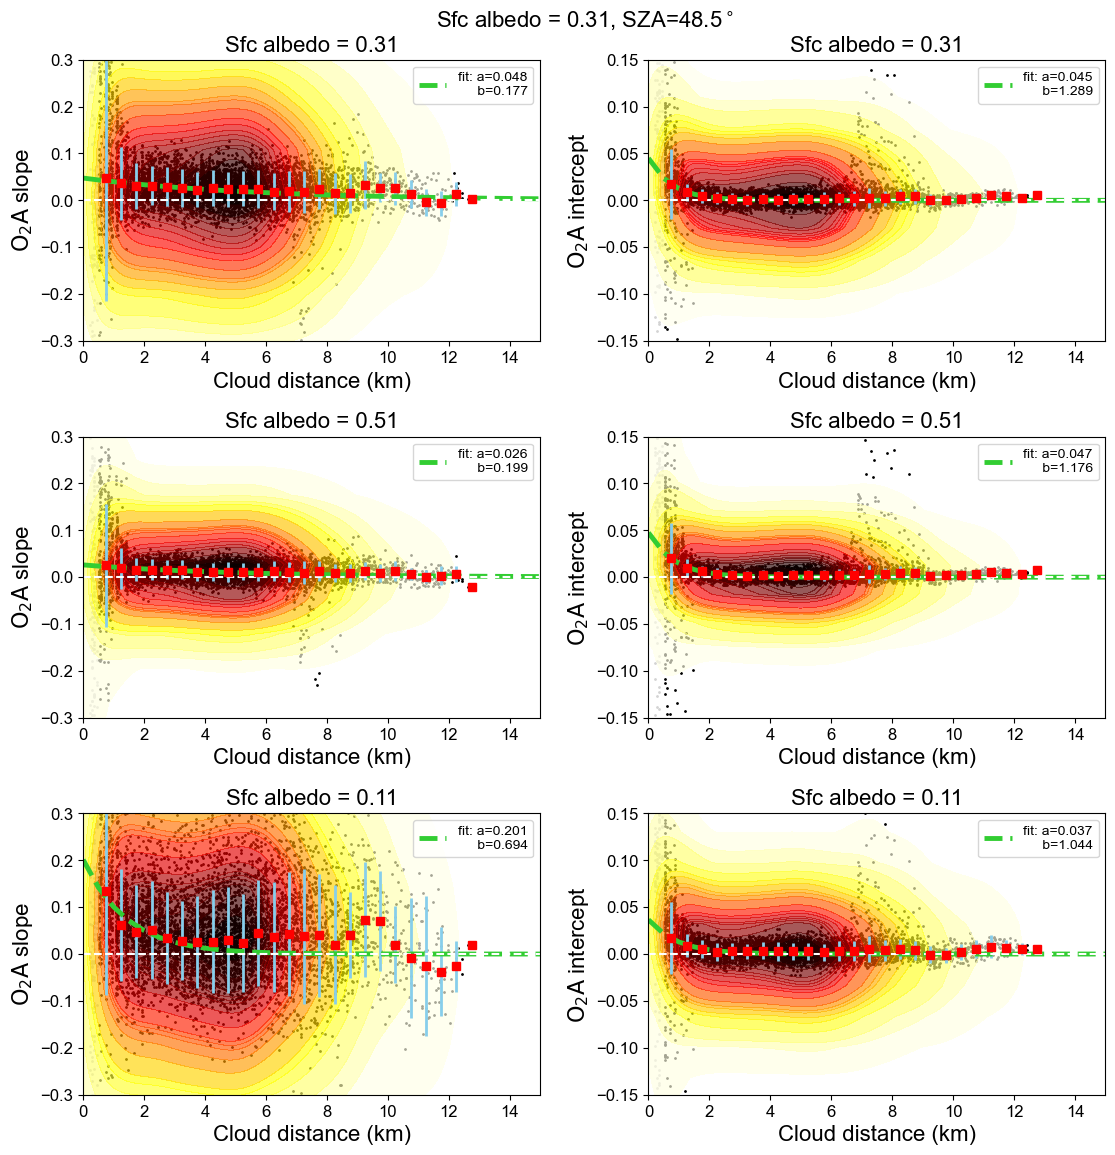

In [22]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12



#"""

cloud_dist = df_all.cld_dis
rad_3d = data_1.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_1.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_1.slope_1km_all[:,:,0].flatten()[mask], ax11)
heatmap_xy_3(cloud_dist[mask], data_1.inter_1km_all[:,:,0].flatten()[mask], ax12)


rad_3d = data_1_plus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_1_plus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_1_plus_02.slope_1km_all[:,:,0].flatten()[mask], ax21)
heatmap_xy_3(cloud_dist[mask], data_1_plus_02.inter_1km_all[:,:,0].flatten()[mask], ax22)


rad_3d = data_1_minus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_1_minus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_1_minus_02.slope_1km_all[:,:,0].flatten()[mask], ax31)
heatmap_xy_3(cloud_dist[mask], data_1_minus_02.inter_1km_all[:,:,0].flatten()[mask], ax32)
#"""


#popt, pcov = curve_fit(func, cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])#, bounds=(0, [3., 1., 0.5]))

#ax11.plot(cloud_dist[mask], func(cloud_dist[mask], *popt), 'r--',
#          label='fit: a=%5.3f, b=%5.3ff' % tuple(popt))


"""
ax11.scatter(cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])
ax12.scatter(cloud_dist[mask], o1.inter_1km_all[:,:,0][mask])
ax21.scatter(cloud_dist[mask], o2.slope_1km_all[:,:,0][mask])
ax22.scatter(cloud_dist[mask], o2.inter_1km_all[:,:,0][mask])
ax31.scatter(cloud_dist[mask], o3.slope_1km_all[:,:,0][mask])
ax32.scatter(cloud_dist[mask], o3.inter_1km_all[:,:,0][mask])
#"""
for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = 0, 15
    ax.set_xlim(xmin, xmax)
    ax.hlines(0, 0, xmax, linestyle='--', color='white')
    
ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax31.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax32.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)

ax11.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax12.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax21.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax22.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax31.set_title('Sfc albedo = 0.11', fontsize=label_size)
ax32.set_title('Sfc albedo = 0.11', fontsize=label_size)

limit_1 = 0.3
limit_2 = 0.15
for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-limit_1, limit_1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-limit_2, limit_2)

    
fig.suptitle('Sfc albedo = 0.31, SZA=48.5$^\circ$', fontsize=16)

#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

---------------
E-folding dis: 5.632025002933724
---------------
E-folding dis: 1.039705235501975
---------------
E-folding dis: 5.290646671387039
---------------
E-folding dis: 0.9842706613788185
---------------
E-folding dis: 1.2909997685039665
---------------
E-folding dis: 0.8655720945046037


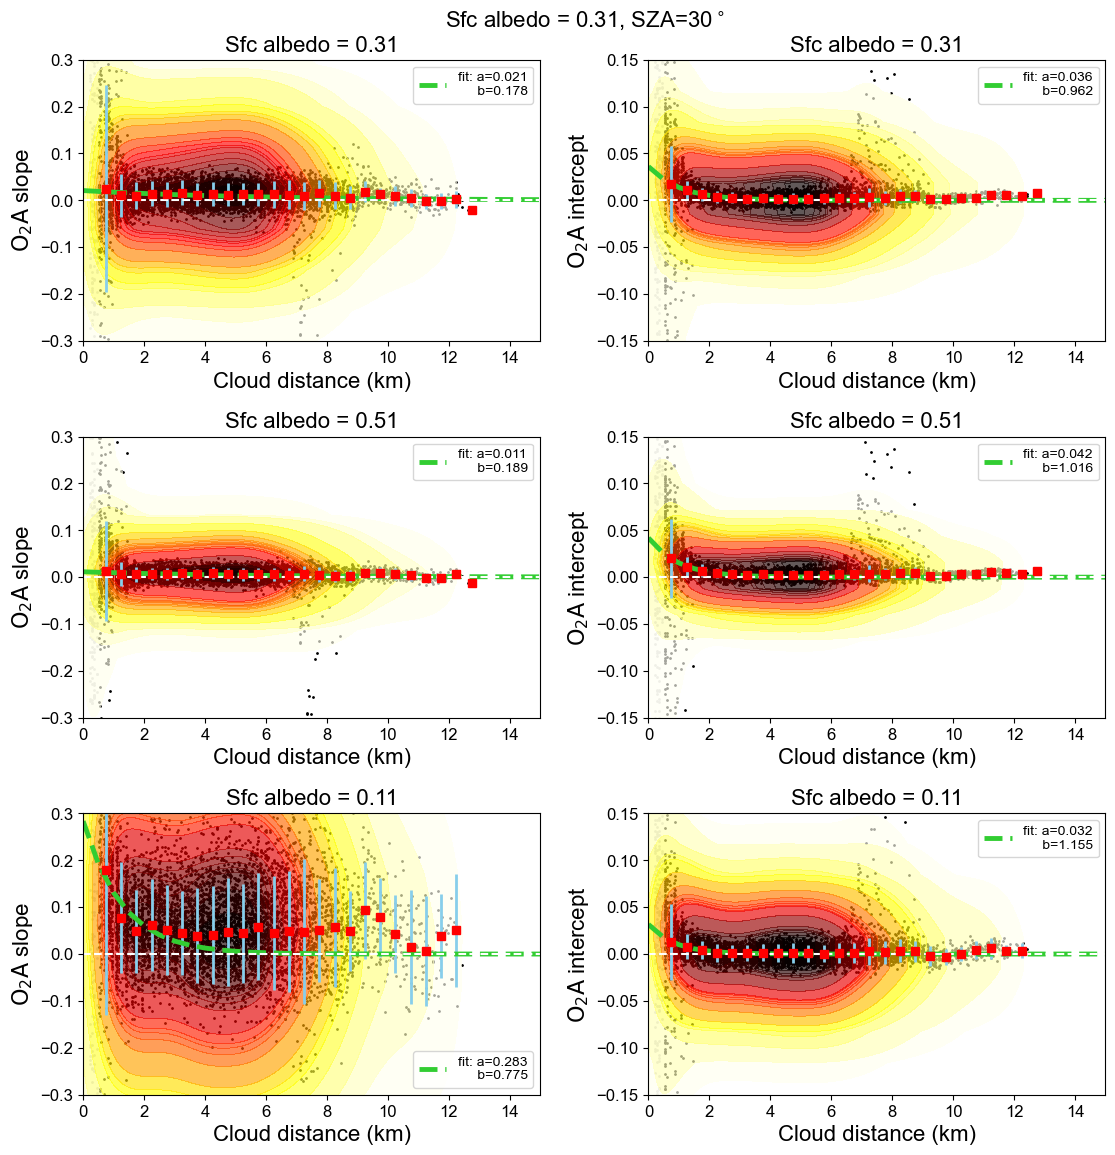

In [25]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12



#"""

cloud_dist = df_all.cld_dis
rad_3d = data_2.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_2.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_2.slope_1km_all[:,:,0].flatten()[mask], ax11)
heatmap_xy_3(cloud_dist[mask], data_2.inter_1km_all[:,:,0].flatten()[mask], ax12)


rad_3d = data_2_plus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_2_plus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_2_plus_02.slope_1km_all[:,:,0].flatten()[mask], ax21)
heatmap_xy_3(cloud_dist[mask], data_2_plus_02.inter_1km_all[:,:,0].flatten()[mask], ax22)


rad_3d = data_2_minus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_2_minus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_2_minus_02.slope_1km_all[:,:,0].flatten()[mask], ax31)
heatmap_xy_3(cloud_dist[mask], data_2_minus_02.inter_1km_all[:,:,0].flatten()[mask], ax32)
#"""


#popt, pcov = curve_fit(func, cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])#, bounds=(0, [3., 1., 0.5]))

#ax11.plot(cloud_dist[mask], func(cloud_dist[mask], *popt), 'r--',
#          label='fit: a=%5.3f, b=%5.3ff' % tuple(popt))


"""
ax11.scatter(cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])
ax12.scatter(cloud_dist[mask], o1.inter_1km_all[:,:,0][mask])
ax21.scatter(cloud_dist[mask], o2.slope_1km_all[:,:,0][mask])
ax22.scatter(cloud_dist[mask], o2.inter_1km_all[:,:,0][mask])
ax31.scatter(cloud_dist[mask], o3.slope_1km_all[:,:,0][mask])
ax32.scatter(cloud_dist[mask], o3.inter_1km_all[:,:,0][mask])
#"""
for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = 0, 15
    ax.set_xlim(xmin, xmax)
    ax.hlines(0, 0, xmax, linestyle='--', color='white')
    
ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax31.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax32.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)

ax11.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax12.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax21.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax22.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax31.set_title('Sfc albedo = 0.11', fontsize=label_size)
ax32.set_title('Sfc albedo = 0.11', fontsize=label_size)

limit_1 = 0.3
limit_2 = 0.15
for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-limit_1, limit_1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-limit_2, limit_2)

    
fig.suptitle('Sfc albedo = 0.31, SZA=30$^\circ$', fontsize=16)

#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

---------------
E-folding dis: 2.4371325739807768
---------------
E-folding dis: 0.5174408466834473
---------------
E-folding dis: 4.245694245419385
---------------
E-folding dis: 0.6759359636948916
---------------
E-folding dis: 0.8596947126184293
---------------
E-folding dis: 1.2891700575548939


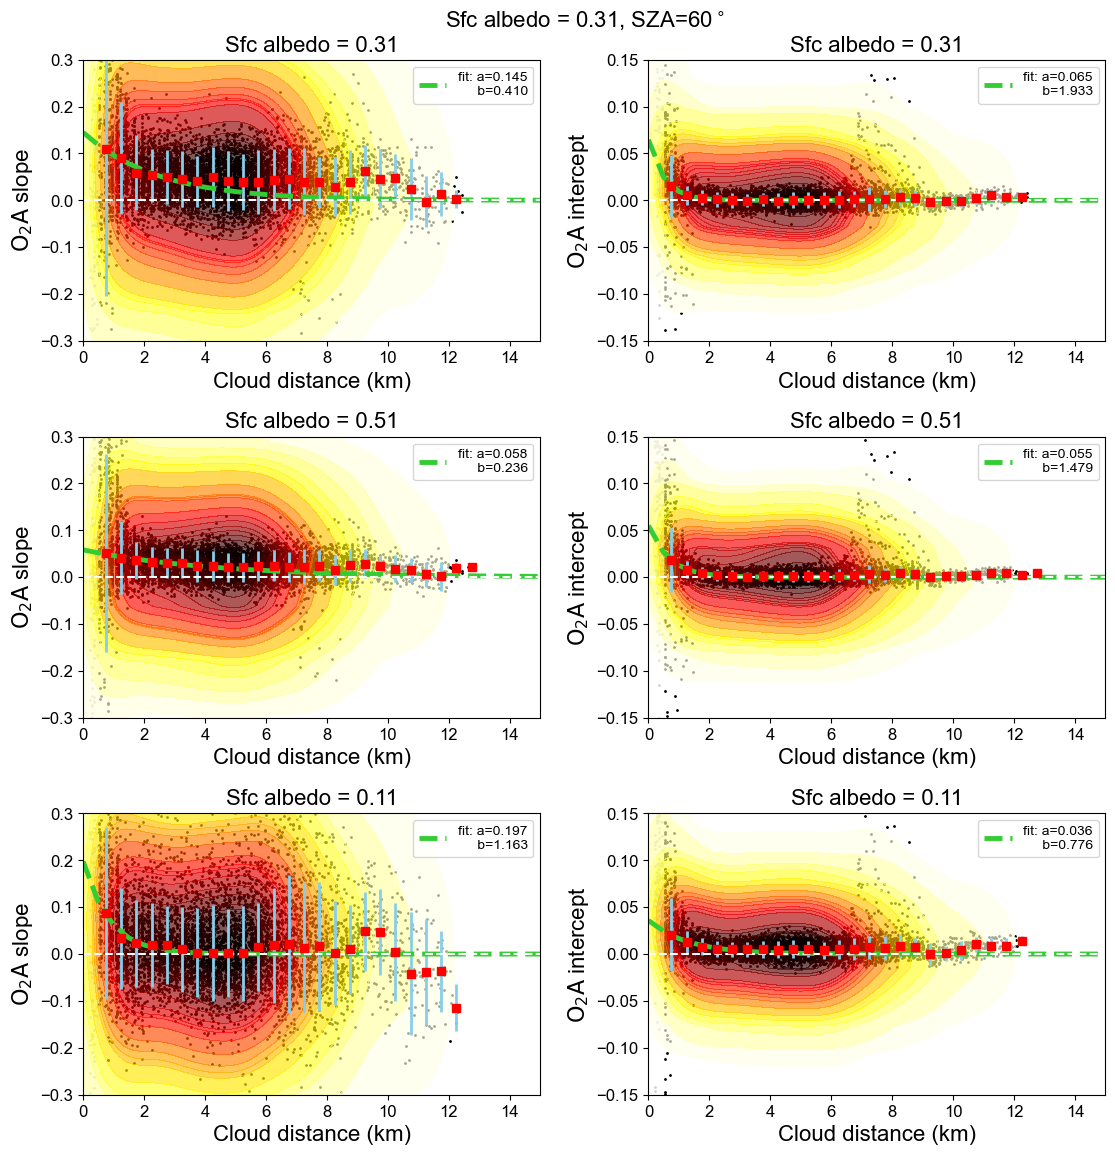

In [32]:
fig, ((ax11, ax12), 
      (ax21, ax22),
      (ax31, ax32)) = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12



#"""

cloud_dist = df_all.cld_dis
rad_3d = data_3.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_3.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_3.slope_1km_all[:,:,0].flatten()[mask], ax11)
heatmap_xy_3(cloud_dist[mask], data_3.inter_1km_all[:,:,0].flatten()[mask], ax12)


rad_3d = data_3_plus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_3_plus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_3_plus_02.slope_1km_all[:,:,0].flatten()[mask], ax21)
heatmap_xy_3(cloud_dist[mask], data_3_plus_02.inter_1km_all[:,:,0].flatten()[mask], ax22)


rad_3d = data_3_minus_02.rad_1km_c3d_all[:,:,-1].flatten()
rad_clr = data_3_minus_02.rad_1km_clr_all[:,:,-1].flatten()
mask = np.logical_and(cloud_dist > 0, rad_3d>rad_clr)
heatmap_xy_3(cloud_dist[mask], data_3_minus_02.slope_1km_all[:,:,0].flatten()[mask], ax31)
heatmap_xy_3(cloud_dist[mask], data_3_minus_02.inter_1km_all[:,:,0].flatten()[mask], ax32)
#"""


#popt, pcov = curve_fit(func, cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])#, bounds=(0, [3., 1., 0.5]))

#ax11.plot(cloud_dist[mask], func(cloud_dist[mask], *popt), 'r--',
#          label='fit: a=%5.3f, b=%5.3ff' % tuple(popt))


"""
ax11.scatter(cloud_dist[mask], o1.slope_1km_all[:,:,0][mask])
ax12.scatter(cloud_dist[mask], o1.inter_1km_all[:,:,0][mask])
ax21.scatter(cloud_dist[mask], o2.slope_1km_all[:,:,0][mask])
ax22.scatter(cloud_dist[mask], o2.inter_1km_all[:,:,0][mask])
ax31.scatter(cloud_dist[mask], o3.slope_1km_all[:,:,0][mask])
ax32.scatter(cloud_dist[mask], o3.inter_1km_all[:,:,0][mask])
#"""
for ax in [ax11, ax21, ax31, ax12, ax22, ax32]:
    ax.set_xlabel('Cloud distance (km)', fontsize=label_size)
    ax.tick_params(axis='both', labelsize=tick_size)
    xmin, xmax = 0, 15
    ax.set_xlim(xmin, xmax)
    ax.hlines(0, 0, xmax, linestyle='--', color='white')
    
ax11.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax12.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax21.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax22.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)
ax31.set_ylabel('$\mathrm{O_2A}$ slope', fontsize=label_size)
ax32.set_ylabel('$\mathrm{O_2A}$ intercept', fontsize=label_size)

ax11.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax12.set_title('Sfc albedo = 0.31', fontsize=label_size)
ax21.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax22.set_title('Sfc albedo = 0.51', fontsize=label_size)
ax31.set_title('Sfc albedo = 0.11', fontsize=label_size)
ax32.set_title('Sfc albedo = 0.11', fontsize=label_size)

limit_1 = 0.3
limit_2 = 0.15
for ax in [ax11, ax21, ax31]:
    ax.set_ylim(-limit_1, limit_1)
    
for ax in [ax12, ax22, ax32]:
    ax.set_ylim(-limit_2, limit_2)

    
fig.suptitle('Sfc albedo = 0.31, SZA=60$^\circ$', fontsize=16)

#ax.plot([20, 20], [0, 1.1], 'r')
#ax.plot([400, 400], [0, 1.1], 'r')
#ax.set_ylim(0, 1.1)
#ax.fill_between(t[2:41]*1e9, intensity[2:41], 0, color='lightgrey', interpolate=True)
#I0 = quad(intensity_fxn, 20e-9, 400e-9, args=(decay_const))[0]

#ax.set_yscale('log')
#fig.savefig('Q2.1-2.png', dpi=150, bbox_inches='tight')
plt.show()

In [50]:
sfc_alb = np.array([0.11, 0.31, 0.51])
inter_a_list = np.array([[0.032, 0.036, 0.042], 
                         [0.037, 0.045, 0.047],
                         [0.036, 0.065, 0.055]])

slope_a_list = np.array([[0.283, 0.021, 0.011],
                         [0.201, 0.048, 0.026],
                         [0.197, 0.145, 0.058]])

inter_e_list = np.array([[0.87, 1.04, 0.98], 
                         [0.96, 0.78, 0.85],
                         [1.29, 0.52, 0.68]])

slope_e_list = np.array([[1.29, 5.63, 5.29],
                         [1.44, 5.64, 5.04],
                         [0.86, 2.44, 4.25]])

In [51]:
sfc_alb.shape

(3,)

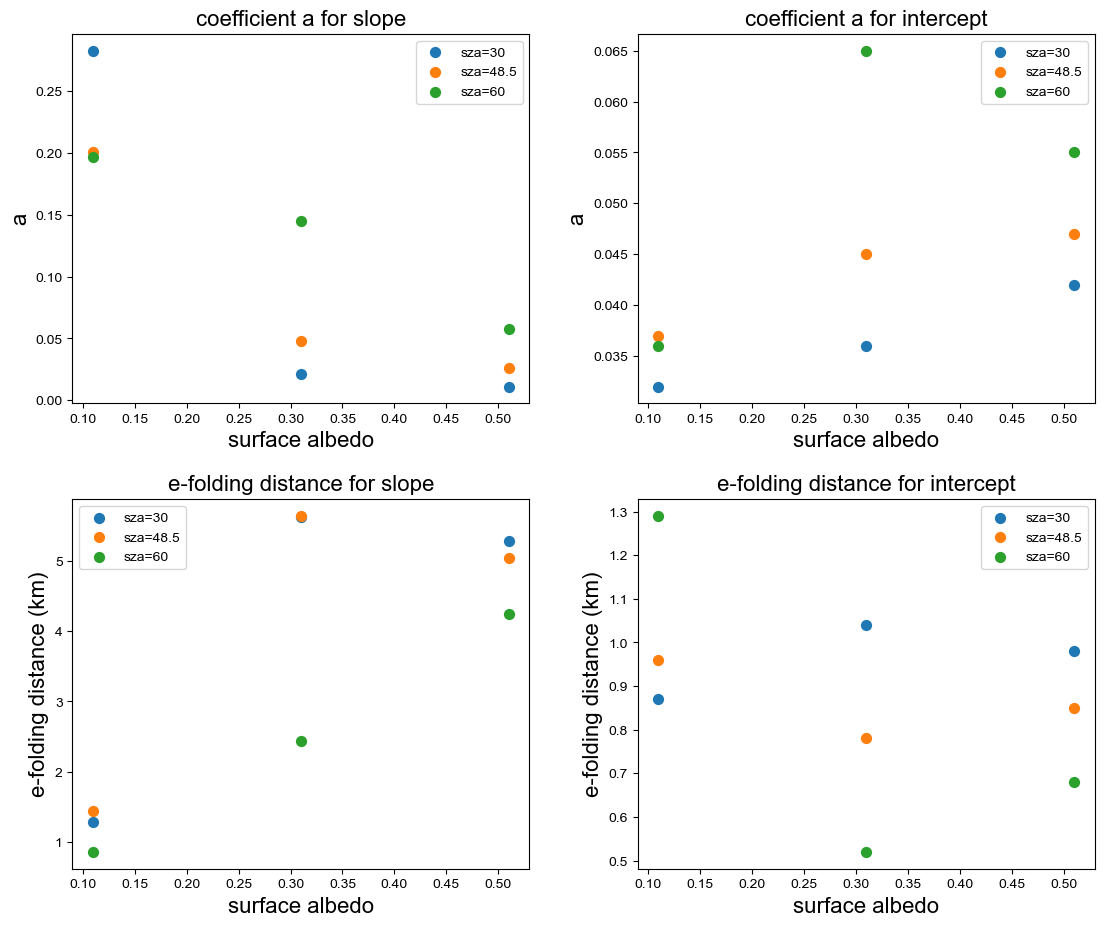

In [52]:
sfc_alb = np.array([0.11, 0.31, 0.51])
inter_a_list = np.array([[0.032, 0.036, 0.042], 
                         [0.037, 0.045, 0.047],
                         [0.036, 0.065, 0.055]])

slope_a_list = np.array([[0.283, 0.021, 0.011],
                         [0.201, 0.048, 0.026],
                         [0.197, 0.145, 0.058]])

inter_e_list = np.array([[0.87, 1.04, 0.98], 
                         [0.96, 0.78, 0.85],
                         [1.29, 0.52, 0.68]])

slope_e_list = np.array([[1.29, 5.63, 5.29],
                         [1.44, 5.64, 5.04],
                         [0.86, 2.44, 4.25]])


fig, ((ax1, ax2),
       (ax21, ax22)) = plt.subplots(2, 2, figsize=(12, 10), sharex=False)
fig.tight_layout(pad=5.0)
label_size = 16
tick_size = 12


ax1.scatter(sfc_alb, slope_a_list[0], s=50, label='sza=30')
ax1.scatter(sfc_alb, slope_a_list[1], s=50, label='sza=48.5')
ax1.scatter(sfc_alb, slope_a_list[2], s=50, label='sza=60')
#ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)
ax2.scatter(sfc_alb, inter_a_list[0], s=50, label='sza=30')
ax2.scatter(sfc_alb, inter_a_list[1], s=50, label='sza=48.5')
ax2.scatter(sfc_alb, inter_a_list[2], s=50, label='sza=60')


ax21.scatter(sfc_alb, slope_e_list[0], s=50, label='sza=30')
ax21.scatter(sfc_alb, slope_e_list[1], s=50, label='sza=48.5')
ax21.scatter(sfc_alb, slope_e_list[2], s=50, label='sza=60')
#ax.hist2d(plot_x, plot_y, bins=150, norm=LogNorm(), cmap=light_jet)
ax22.scatter(sfc_alb, inter_e_list[0], s=50, label='sza=30')
ax22.scatter(sfc_alb, inter_e_list[1], s=50, label='sza=48.5')
ax22.scatter(sfc_alb, inter_e_list[2], s=50, label='sza=60')

"""val_mask = ~(np.isnan(value_avg) | np.isnan(value_std) | np.isinf(value_avg) | np.isinf(value_std))
#print(value_avg[val_mask])
#print(value_std[val_mask])
temp_r2 = 0
for cld_max in np.arange(3, 15, 0.5):
    cld_val = cld_list[val_mask]
    xx = cld_val[cld_val<=cld_max]
    yy = value_avg[val_mask][cld_val<=cld_max]
    popt, pcov = curve_fit(func, xx, yy, bounds=([-2, 0.], [2, 10,]),
                           p0=(0.1, 0.7),
                           maxfev=3000,
                           #sigma=value_std[val_mask], 
                           #absolute_sigma=True,
                          )
    residuals = yy - func(xx, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((yy-np.mean(yy))**2)
    r_squared = 1 - (ss_res / ss_tot)

    if r_squared > temp_r2:
        temp_r2 = r_squared
    else:
        break

plot_xx = np.arange(0, cld_list.max()+0.75, 0.5)
ax.plot(plot_xx, func(plot_xx, *popt), '--', color='limegreen', 
          label='fit: a=%5.3f\n     b=%5.3f' % tuple(popt), linewidth=3.5)
print('-'*15)
print(f'E-folding dis: {1/popt[1]}')"""
#ax.plot(cld_list, func(cld_list, 1, 2), '--', color='green',)
#ax.plot(cld_list, func(cld_list, 0.2, 1), '--', color='cyan',)
ax1.legend()
ax2.legend()
ax21.legend()
ax22.legend()

ax1.set_ylabel('a', fontsize=label_size)
ax2.set_ylabel('a', fontsize=label_size)

ax21.set_ylabel('e-folding distance (km)', fontsize=label_size)
ax22.set_ylabel('e-folding distance (km)', fontsize=label_size)

ax1.set_xlabel('surface albedo', fontsize=label_size)
ax2.set_xlabel('surface albedo', fontsize=label_size)
ax21.set_xlabel('surface albedo', fontsize=label_size)
ax22.set_xlabel('surface albedo', fontsize=label_size)

ax1.set_title('coefficient a for slope', fontsize=label_size)
ax2.set_title('coefficient a for intercept', fontsize=label_size)
ax21.set_title('e-folding distance for slope', fontsize=label_size)
ax22.set_title('e-folding distance for intercept', fontsize=label_size)

plt.show()